##  Does age affect the number of minutes played?

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# import dataset

In [11]:
data = pd.read_csv("../../Liverpool_players_season2020-2021_2021-2022.csv")
# print size of data
print(data.shape)
# show first 10 rows
data.head(10)

(1051, 19)


,Unnamed: 0,Player,shirt_number,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Tkl,Int,Blocks
0,0,Diogo Jota,20,POR,FW,24-253,60,1,0,0,0,2,2,0,0,22,1,0,0
1,1,Roberto Firmino,9,BRA,FW,29-316,30,1,0,0,0,1,1,0,0,17,1,0,1
2,2,Sadio Mané,10,SEN,LW,29-126,90,0,0,0,0,3,0,0,0,45,1,0,1
3,3,Mohamed Salah,11,EGY,RW,29-060,90,1,2,0,0,5,2,0,0,35,0,0,0
4,4,Naby Keïta,8,GUI,"LM,RM",26-185,82,0,0,0,0,0,0,0,0,52,6,0,2
5,5,Harvey Elliott,67,ENG,RM,18-132,8,0,0,0,0,0,0,0,0,7,0,0,0
6,6,James Milner,7,ENG,"CM,LM",35-222,90,0,0,0,0,0,0,1,0,81,3,2,2
7,7,Alex Oxlade-Chamberlain,15,ENG,RM,27-364,60,0,0,0,0,2,0,0,0,28,0,1,1
8,8,Fabinho,3,BRA,CM,27-295,30,0,0,0,0,0,0,0,0,25,0,0,2
9,9,Kostas Tsimikas,21,GRE,LB,25-094,90,0,0,0,0,2,1,0,0,77,3,0,1


# data preprocessing and cleaning

In [12]:
# remove irrelevant variables
data = data.drop(["shirt_number"], axis=1) 
# remove first column
data = data.iloc[:,1:]
# convert Age to numeric
data["Age"] = data["Age"].str[:2].astype(int)
# remove any rows with missing data
data = data.dropna() 
# Split the strings in the "Pos" column by comma and keep only the first position listed
data["Pos"] = data["Pos"].str.split(",", n=1, expand=True)[0]
# show first 10 rows
data.head(10)

,Player,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Tkl,Int,Blocks
0,Diogo Jota,POR,FW,24,60,1,0,0,0,2,2,0,0,22,1,0,0
1,Roberto Firmino,BRA,FW,29,30,1,0,0,0,1,1,0,0,17,1,0,1
2,Sadio Mané,SEN,LW,29,90,0,0,0,0,3,0,0,0,45,1,0,1
3,Mohamed Salah,EGY,RW,29,90,1,2,0,0,5,2,0,0,35,0,0,0
4,Naby Keïta,GUI,LM,26,82,0,0,0,0,0,0,0,0,52,6,0,2
5,Harvey Elliott,ENG,RM,18,8,0,0,0,0,0,0,0,0,7,0,0,0
6,James Milner,ENG,CM,35,90,0,0,0,0,0,0,1,0,81,3,2,2
7,Alex Oxlade-Chamberlain,ENG,RM,27,60,0,0,0,0,2,0,0,0,28,0,1,1
8,Fabinho,BRA,CM,27,30,0,0,0,0,0,0,0,0,25,0,0,2
9,Kostas Tsimikas,GRE,LB,25,90,0,0,0,0,2,1,0,0,77,3,0,1


## prepare data for analysis

In [13]:
# print unqiue values in age column in ascending order
print(sorted(data.Age.unique()))
# divide age into 5 groups
# first group: 17-20
# second group: 21-24
# third group: 25-28
# fourth group: 29-32
# fifth group: 33-36
data["Age"] = pd.cut(data["Age"], bins=[16, 20, 24, 28, 32, 36], labels=["17-20", "21-24", "25-28", "29-32", "33-36"])



[17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36]


Text(0, 0.5, 'Average minutes played')

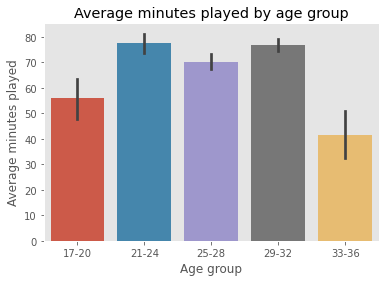

In [14]:
# plot relationship between age and minutes played in average
sns.barplot(x="Age", y="Min", data=data)
plt.title("Average minutes played by age group")
plt.xlabel("Age group")
plt.grid(False)
plt.ylabel("Average minutes played")

# inferential statistics

##  Does age affect the number of minutes played?

* The null hypothesis states that there are no significant differences between the means of the groups being compared.

In [15]:
import scipy.stats as stats
# Grouping the data by position and converting the ScoringContribution column into a list
grouped_data = data.groupby('Age')['Min'].apply(list)

# Performing one-way ANOVA
f_stat, p_value = stats.f_oneway(*grouped_data)

# Printing the results
print("F-statistic:", f_stat)
print("P-value:", p_value)


# calculate  the range of critical F-values 
degree_of_freedom = data.shape[0] - 1
numOfCategories = len(data.Age.unique())
print("Lower critical F-value: ",stats.f.ppf(0.025, numOfCategories-1,degree_of_freedom))
print("Upper critical F-value: ",stats.f.ppf(0.975, numOfCategories-1,degree_of_freedom))

F-statistic: 25.700058035329
P-value: 2.4356957809945952e-20
Lower critical F-value:  0.121017357498983
Upper critical F-value:  2.7979813415061896


* As p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference age and number of minutes played.
*  A larger F-statistic suggests a larger difference between the group means.
* Since the obtained F-statistic of 25.700058035329 falls far outside this range, it confirms the significance of the observed differences.

Inferential Question: Does age affect the number of minutes played?

Explanation for Business Perspective:

### Analyzing the relationship between age and the number of minutes played can provide valuable insights for the club's management and decision-making processes. By understanding how age influences playing time, the club can make informed decisions regarding player contracts, recruitment, and squad management. Here's how the analysis can be explained from a business perspective:

>Player Development and Retention:
* The analysis can help identify trends in player performance and playing time as they age. The club can assess whether players tend to play fewer minutes as they get older, indicating a decline in performance or physical abilities. This information can guide decisions on player contracts, such as negotiating suitable terms for older players or planning for potential replacements.

>Youth Academy and Recruitment:
* If the analysis reveals that younger players tend to receive more playing time, it can emphasize the importance of investing in the club's youth academy and recruiting young talents. This knowledge can guide the scouting and recruitment strategy, focusing on promising young players who have the potential to contribute significantly and accumulate playing time over the years.

>Squad Planning and Rotation:
* Understanding the relationship between age and playing time can help in squad planning and rotation strategies. The club can manage the workload of older players by strategically resting them during certain matches or substituting them with younger players. This approach can help maintain the performance and longevity of senior players while providing opportunities for younger talents to gain valuable experience and develop.

>Transfer Market Decisions:
* If the analysis reveals that age strongly influences playing time, it can impact the club's transfer market decisions. The club may consider selling or loaning out older players who are receiving limited playing time, allowing them to pursue opportunities elsewhere while freeing up resources for recruiting younger talents who can contribute more on the field.

>Long-term Succession Planning:
* By understanding the relationship between age and playing time, the club can develop a long-term succession plan. This involves identifying talented young players and providing them with opportunities to gradually replace older players as they retire or their playing time reduces. This approach ensures a smooth transition and continuity in the team's performance over time.

Overall, analyzing the relationship between age and the number of minutes played offers valuable insights that can influence key decisions in player management, recruitment, and long-term planning, ultimately contributing to the club's success both on and off the field.